In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import seaborn as sns

/home-2/jpopp4@jhu.edu/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
#adata = sc.read_h5ad('../data/katie.h5ad')
adata = sc.read_h5ad('../data/katie.graphed.h5ad')

In [4]:
adata.obs

Batch  ClusterID ClusterName  EmptyDrops_FDR  \
Batch1_Lane1_AAACCCACAAAGGGTC  Batch1          2           1             0.0   
Batch1_Lane1_AAACCCAGTATCAGGG  Batch1          2           1             0.0   
Batch1_Lane1_AAACCCATCGGAATGG  Batch1         21          20             0.0   
Batch1_Lane1_AAACCCATCTTTGCTA  Batch1          3           2             0.0   
Batch1_Lane1_AAACGAACAATTGAAG  Batch1          5           4             0.0   
...                               ...        ...         ...             ...   
Batch3_Lane4_TTTGGTTGTGAATGAT  Batch3          1           0             0.0   
Batch3_Lane4_TTTGGTTTCGAAGCCC  Batch3          4           3             0.0   
Batch3_Lane4_TTTGGTTTCGAGATAA  Batch3          8           7             0.0   
Batch3_Lane4_TTTGTTGAGGATATAC  Batch3         10           9             0.0   
Batch3_Lane4_TTTGTTGTCCTCTCGA  Batch3          2           1             0.0   

                               EmptyDrops_Limited  EmptyDrops_LogProb  \
Batch1_Lane1_AAACCCACAAAGGGTC                   1        -7650.903809   
Batch1_Lane1_AAACCCAGTATCAGGG                   1        -6116.937988   
Batch1_Lane1_AAACCCATCGGAATGG                   1       -12953.576172   
Batch1_Lane1_AAACCCATCTTTGCTA                   1       -18410.820312   
Batch1_Lane1_AAACGAACAATTGAAG                   0        -7476.399902   
...                                           ...                 ...   
Batch3_Lane4_TTTGGTTGTGAATGAT                   1        -9277.801758   
Batch3_Lane4_TTTGGTTTCGAAGCCC                   1       -17034.960938   
Batch3_Lane4_TTTGGTTTCGAGATAA                   1       -18296.437500   
Batch3_Lane4_TTTGTTGAGGATATAC                   1       -15747.893555   
Batch3_Lane4_TTTGTTGTCCTCTCGA                   1        -7100.217285   

                               EmptyDrops_Pvalue  EmptyDrops_Total  \
Batch1_Lane1_AAACCCACAAAGGGTC           0.000100              4696   
Batch1_Lane1_AAACCCAGTATCAGGG           0.000100              4394   
Batch1_Lane1_AAACCCATCGGAATGG           0.000100             14661   
Batch1_Lane1_AAACCCATCTTTGCTA           0.000100             26229   
Batch1_Lane1_AAACGAACAATTGAAG           0.013099              7502   
...                                          ...               ...   
Batch3_Lane4_TTTGGTTGTGAATGAT           0.000100              7724   
Batch3_Lane4_TTTGGTTTCGAAGCCC           0.000100             26242   
Batch3_Lane4_TTTGGTTTCGAGATAA           0.000100             26900   
Batch3_Lane4_TTTGTTGAGGATATAC           0.000100             17489   
Batch3_Lane4_TTTGTTGTCCTCTCGA           0.000100              5085   

                               EmptyDrops_knee SCT_snn_res_0_8  ...  \
Batch1_Lane1_AAACCCACAAAGGGTC           4370.0               3  ...   
Batch1_Lane1_AAACCCAGTATCAGGG           4370.0               1  ...   
Batch1_Lane1_AAACCCATCGGAATGG           4370.0               4  ...   
Batch1_Lane1_AAACCCATCTTTGCTA           4370.0               0  ...   
Batch1_Lane1_AAACGAACAATTGAAG           4370.0               5  ...   
...                                        ...             ...  ...   
Batch3_Lane4_TTTGGTTGTGAATGAT           3508.0               6  ...   
Batch3_Lane4_TTTGGTTTCGAAGCCC           3508.0               2  ...   
Batch3_Lane4_TTTGGTTTCGAGATAA           3508.0               0  ...   
Batch3_Lane4_TTTGTTGAGGATATAC           3508.0               9  ...   
Batch3_Lane4_TTTGTTGTCCTCTCGA           3508.0               8  ...   

                              nCount_RNA nCount_SCT  nFeature_RNA  \
Batch1_Lane1_AAACCCACAAAGGGTC     4696.0     7692.0          2376   
Batch1_Lane1_AAACCCAGTATCAGGG     4394.0     7914.0          1935   
Batch1_Lane1_AAACCCATCGGAATGG    14661.0     9791.0          3857   
Batch1_Lane1_AAACCCATCTTTGCTA    26229.0     9807.0          5498   
Batch1_Lane1_AAACGAACAATTGAAG     7502.0     8292.0          2312   
...                                  ...        ...           ...   
Batch3_Lane4_TTTG

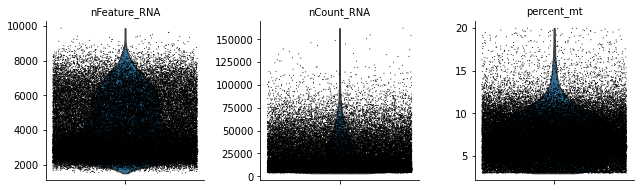

In [50]:
sc.pl.violin(adata, ['nFeature_RNA', 'nCount_RNA', 'percent_mt'],
             jitter=0.4, multi_panel=True)

Look at principal components

In [3]:
adata.obsm['X_pca']=adata.obsm['pca_cell_embeddings']
adata.varm['PCs']=adata.varm['pca_feature_loadings']

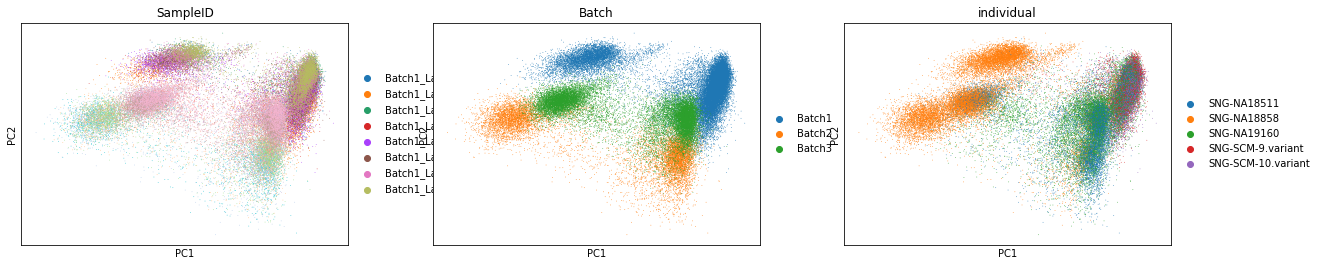

In [4]:
sc.pl.pca(adata, color=["SampleID", "Batch", "individual"])

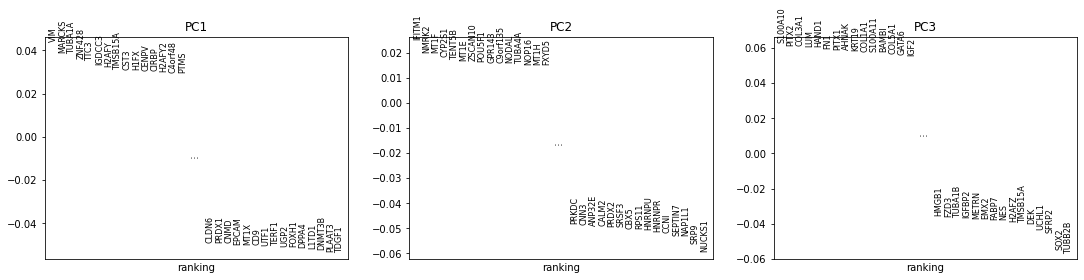

In [8]:
sc.pl.pca_loadings(adata2)

Look at Harmony embeddings

In [5]:
adata.obsm['X_pca']=adata.obsm['harmony_cell_embeddings']
adata.varm['PCs']=adata.varm['harmony_feature_loadings_projected']

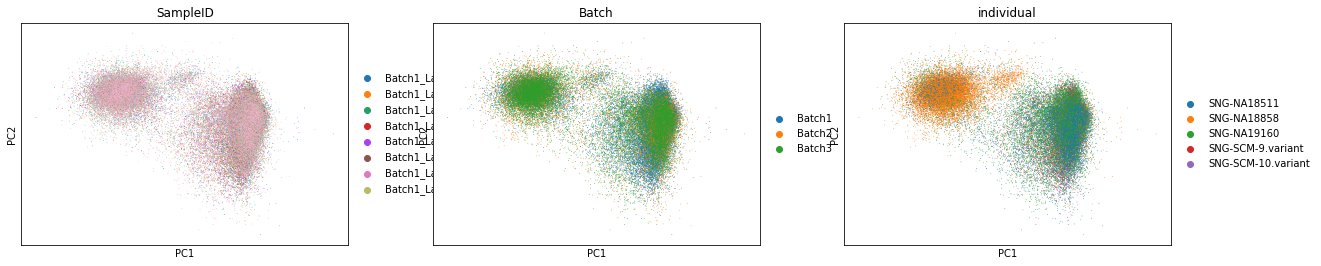

In [8]:
sc.pl.pca(adata, color=['SampleID', "Batch", "individual"])

iPSC markers

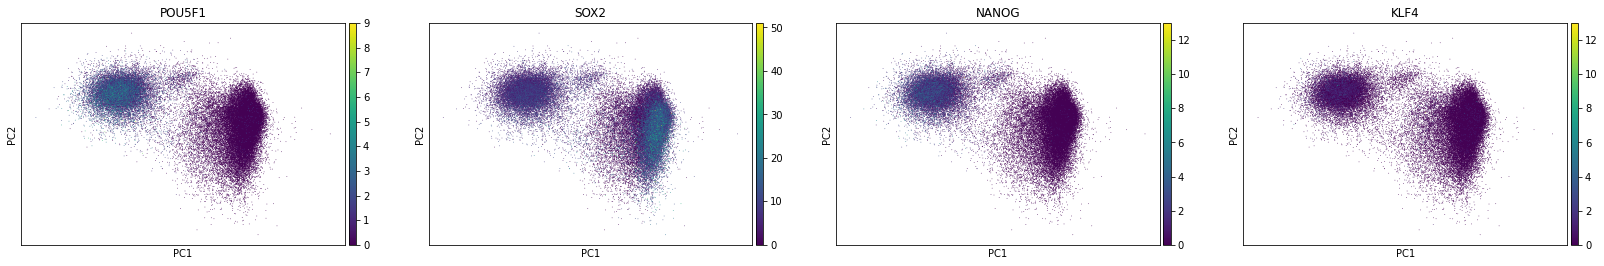

In [10]:
sc.pl.pca(adata, color=['POU5F1', 'SOX2', 'NANOG', 'KLF4'])

Harmony third component (this is pretty easy to imagine in 3D, with PC1 coming out of the page)

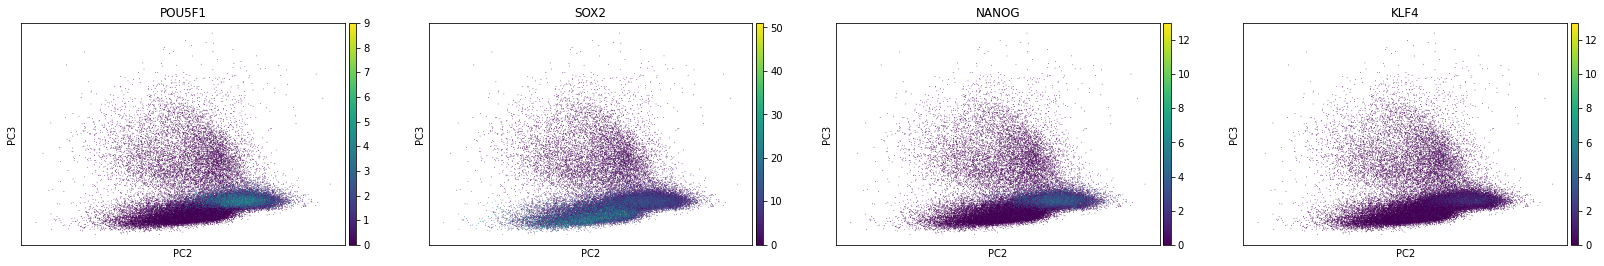

In [11]:
sc.pl.pca(adata, components=['2,3'], color=['POU5F1', 'SOX2', 'NANOG', 'KLF4'])

Ectoderm markers

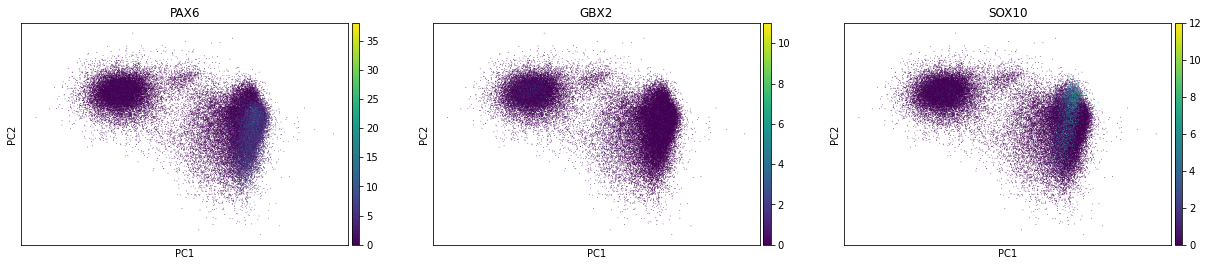

In [12]:
sc.pl.pca(adata, color=['PAX6', 'GBX2','SOX10'])

Endoderm markers

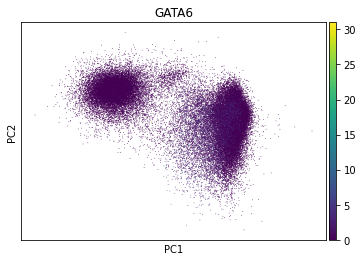

In [13]:
sc.pl.pca(adata, color=['GATA6'])

Mesoderm markers

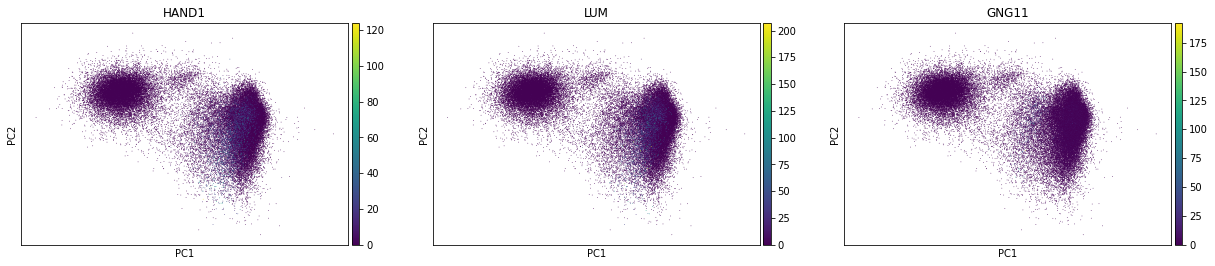

In [14]:
sc.pl.pca(adata, color=['HAND1', 'LUM', 'GNG11'])

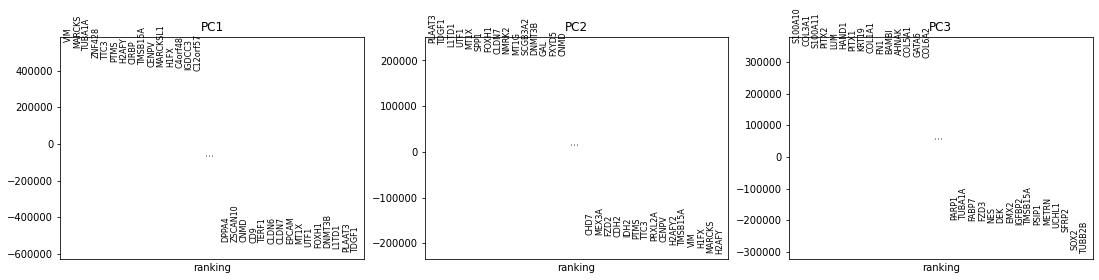

In [15]:
sc.pl.pca_loadings(adata)

Get the UMAP embedding from Seurat into a format scanpy recognizes

In [16]:
adata.obsm['X_umap'] = adata.obsm['umap_cell_embeddings']

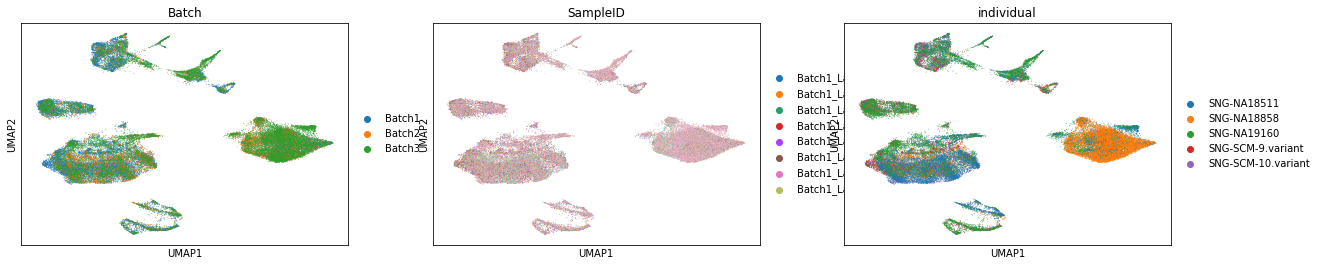

In [17]:
sc.pl.umap(adata, color=['Batch', 'SampleID', 'individual'])

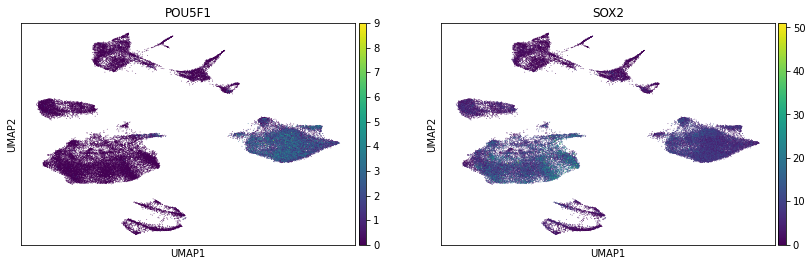

In [18]:
sc.pl.umap(adata, color=['POU5F1','SOX2'])

compute neighorhood grph.  Using n_PCs=20 for now as in scanpy tutorial.
With only n_neighbors=15, the mesoderm and endoderm cells were in the same cluster. trying with 30. docs say this number 
should be between 2 and 100

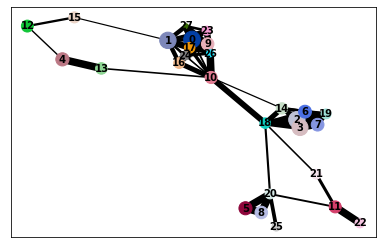

In [27]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=100, use_rep="harmony_cell_embeddings")
sc.tl.paga(adata, groups='seurat_clusters')
sc.pl.paga(adata, color=['seurat_clusters'], threshold=.145)

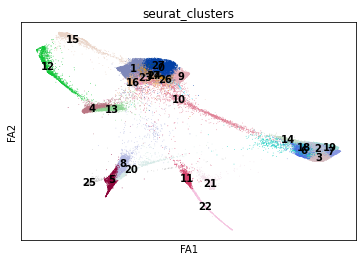

In [26]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['seurat_clusters'], legend_loc='on data')

plot the paga graph and label marker gene expression in each cluster identified by the louvain algorithm
and pluripotency markers

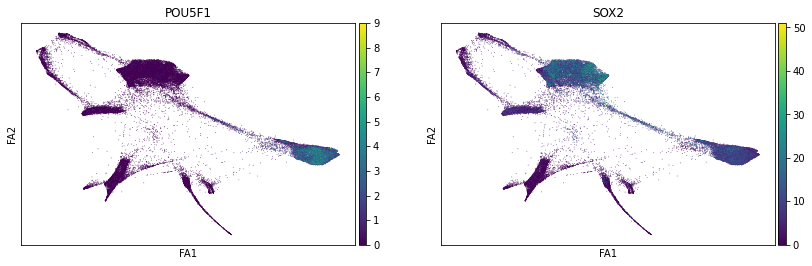

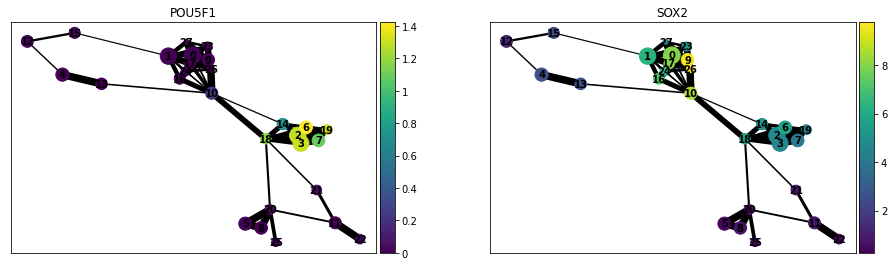

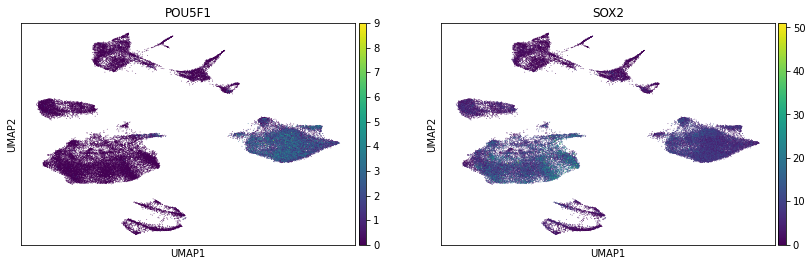

In [5]:
sc.pl.draw_graph(adata, color=['POU5F1', 'SOX2'], legend_loc='on data')
sc.pl.paga(adata, color=['POU5F1', 'SOX2'], threshold=.145)
sc.pl.umap(adata, color=['POU5F1', 'SOX2'])

Mature neuron trajectory

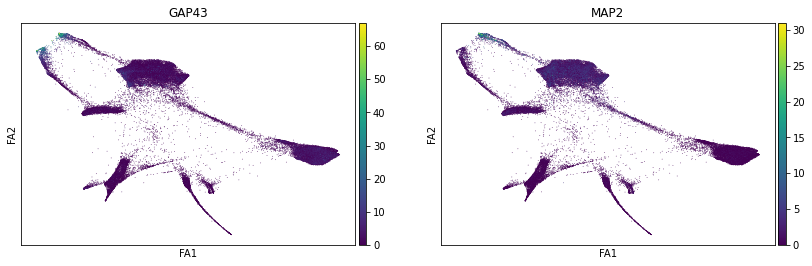

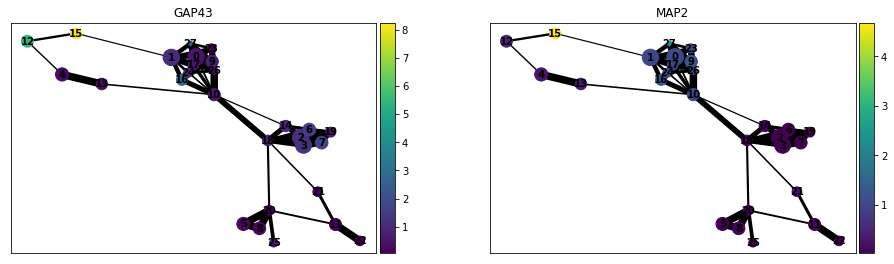

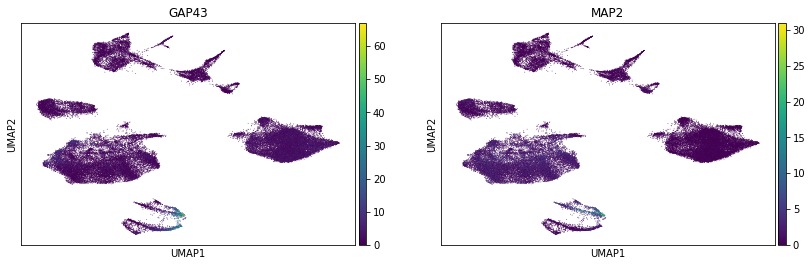

In [30]:
sc.pl.draw_graph(adata, color=['GAP43', 'MAP2'],legend_loc='on data')
sc.pl.paga(adata, color=['GAP43', 'MAP2'],threshold=0.145)
sc.pl.umap(adata, color=['GAP43', 'MAP2'])

Hepatocyte trajectory

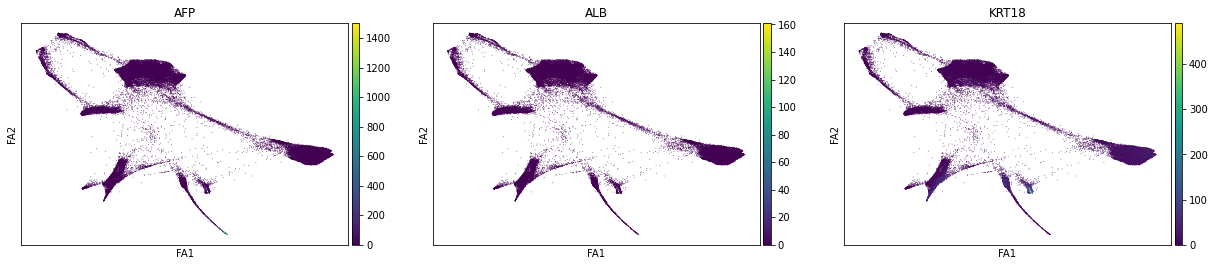

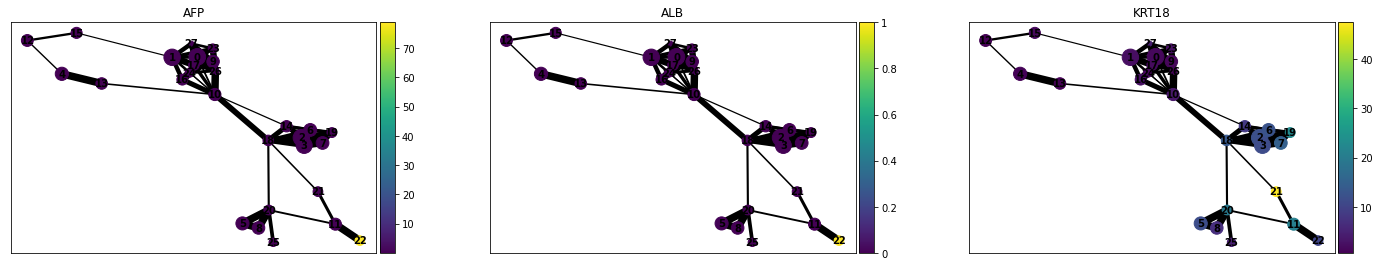

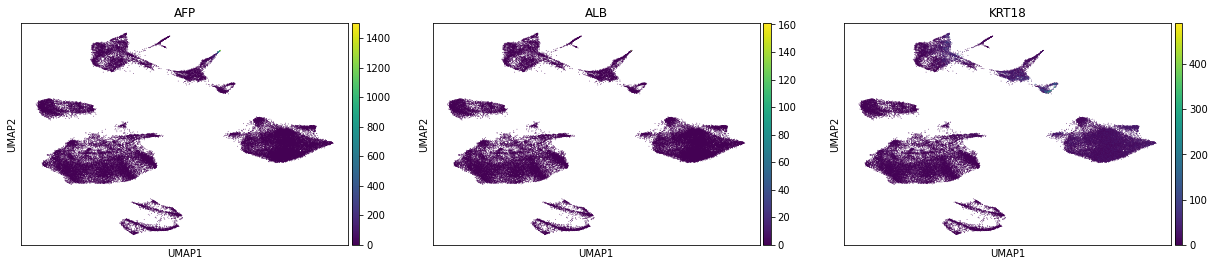

In [33]:
sc.pl.draw_graph(adata, color=['AFP', 'ALB', 'KRT18'],legend_loc='on data')
sc.pl.paga(adata, color=['AFP', 'ALB', 'KRT18'],threshold=0.145)
sc.pl.umap(adata, color=['AFP', 'ALB', 'KRT18'])

Endothelial markers

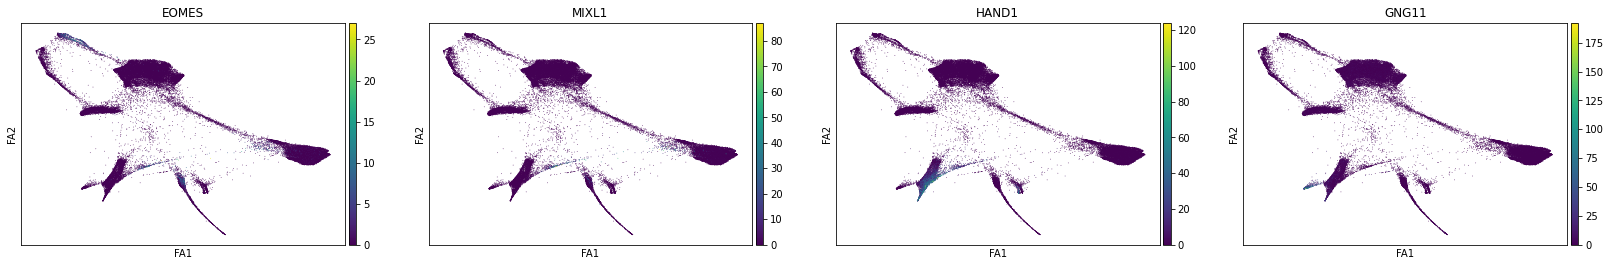

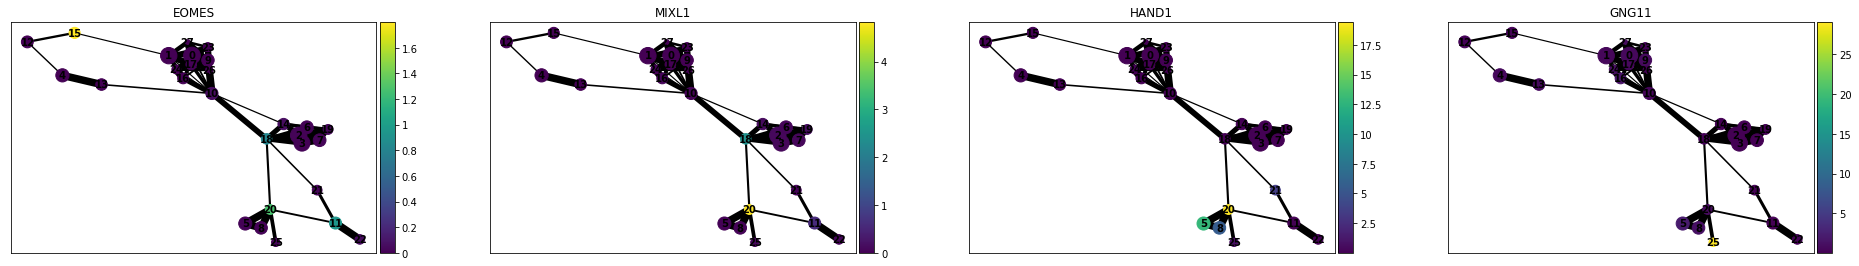

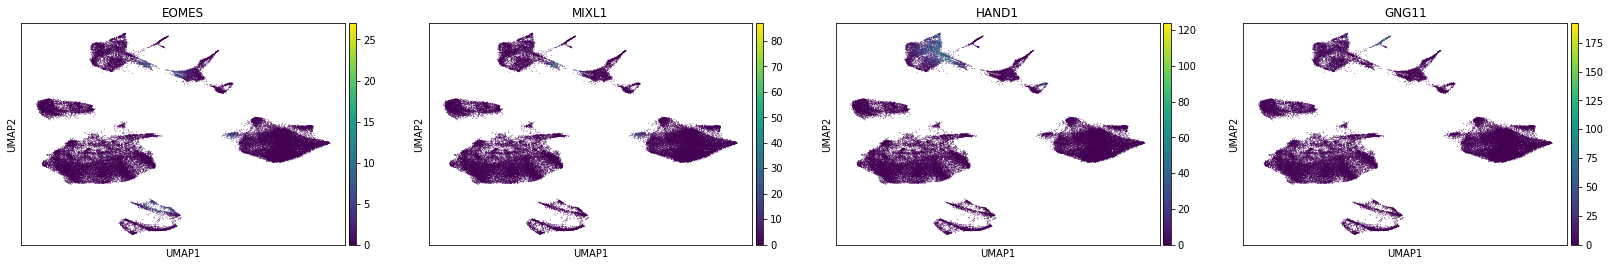

In [6]:
sc.pl.draw_graph(adata, color=['EOMES', 'MIXL1', 'HAND1', 'GNG11'],legend_loc='on data')
sc.pl.paga(adata, color=['EOMES', 'MIXL1', 'HAND1', 'GNG11'],threshold=0.145)
sc.pl.umap(adata, color=['EOMES', 'MIXL1', 'HAND1', 'GNG11'])

In [6]:
#choose a root
adata.uns['iroot'] = np.flatnonzero(adata.obs['seurat_clusters']  == '2')[2]

In [7]:
#compute diffusion pseudotime
sc.tl.dpt(adata)

In [8]:
gene_names = ['POU5F1', 'NANOG', "EOMES", "MIXL1", "SOX17", "FOXA2", "ALB", "AFP", "HAND1", "LUM", "GNG11", "PAX6", "MAP2", "GAP43"]

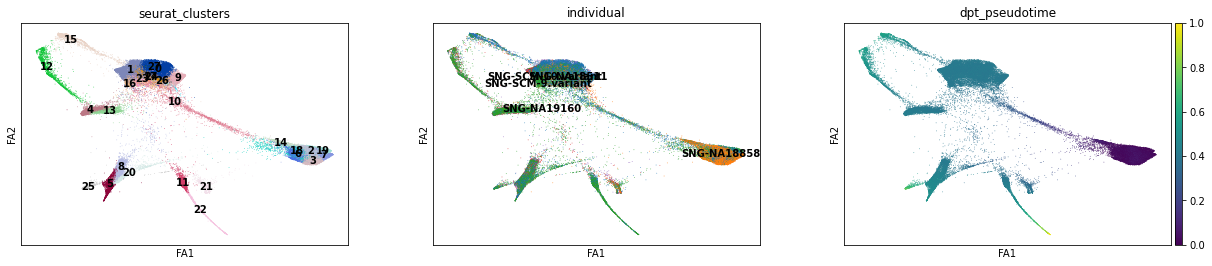

In [9]:
sc.pl.draw_graph(adata, color=['seurat_clusters','individual','dpt_pseudotime'], legend_loc='on data')

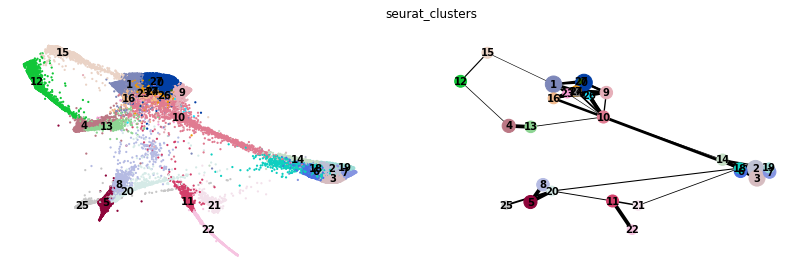

In [10]:
sc.pl.paga_compare(adata, threshold=.145, edge_width_scale=0.5, size=20, color='seurat_clusters')

In [11]:
#manually defined paths
paths = [('hepatocytes', [2,18,21,11,22]),
          ('endothelial', [2,18,20,25]),
          ('mature neuron', [2,18,10,26,17,0,1,15])]

In [15]:
adata.obs['distance']= adata.obs['dpt_pseudotime']

ValueError: setting an array element with a sequence.

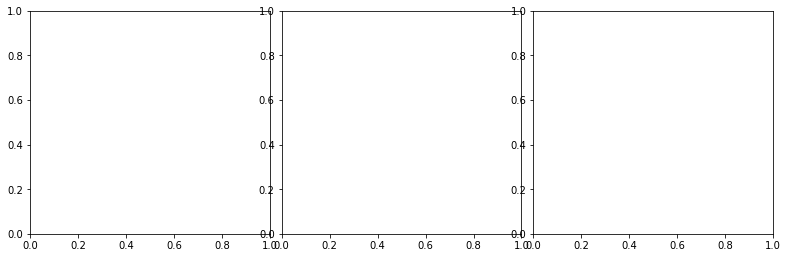

In [17]:
_, axs = pl.subplots(ncols=3, figsize=(12, 5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for (ipath, (descr, path)) in enumerate(paths):
    _, data = sc.pl.paga_path(adata, path, gene_names,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['dpt_pseudotime'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='seurat_clusters',
        color_maps_annotations={'dpt_pseudotime': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
pl.show()

In [69]:
endo = adata[adata.obs['seurat_clusters'].isin(['2','18','20','25'])]
neur = adata[adata.obs['seurat_clusters'].isin(['2','18','10','26','17','0','1','15'])]
hep = adata[adata.obs['seurat_clusters'].isin(['2','18','21','11','22'])]

In [24]:
endo

View of AnnData object with n_obs × n_vars = 7827 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters', 'dpt_pseudotime', 'distance'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'Batch_colors', 'SampleID_colors', 'draw_graph', 'individual_colors', 'neighbors', 'paga', 'seurat_clusters_colors', 'seurat_clusters_sizes', 'iroot', 'diffmap_evals'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_diffmap'
    varm: 'PCs', 'harmony_feature_loadings_projec

In [32]:
neur

AnnData object with n_obs × n_vars = 22688 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters', 'dpt_pseudotime', 'distance'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'Batch_colors', 'SampleID_colors', 'draw_graph', 'individual_colors', 'neighbors', 'paga', 'seurat_clusters_colors', 'seurat_clusters_sizes', 'iroot', 'diffmap_evals'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_diffmap'
    varm: 'PCs', 'harmony_feature_loadings_projected', '

In [26]:
hep

View of AnnData object with n_obs × n_vars = 9748 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters', 'dpt_pseudotime', 'distance'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'Batch_colors', 'SampleID_colors', 'draw_graph', 'individual_colors', 'neighbors', 'paga', 'seurat_clusters_colors', 'seurat_clusters_sizes', 'iroot', 'diffmap_evals'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_diffmap'
    varm: 'PCs', 'harmony_feature_loadings_projec

In [72]:
endo18511 = endo[endo.obs['individual'] =='SNG-NA18511']
endo18858 = endo[endo.obs['individual'] == 'SNG-NA18858']
endo19160 = endo[endo.obs['individual'] == 'SNG-NA19160']

(array([5.264e+03, 3.300e+01, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([0.        , 0.06376817, 0.12753634, 0.19130452, 0.25507268,
        0.31884086, 0.38260904, 0.44637722, 0.51014537, 0.5739136 ,
        0.6376817 ], dtype=float32),
 <a list of 10 Patch objects>)

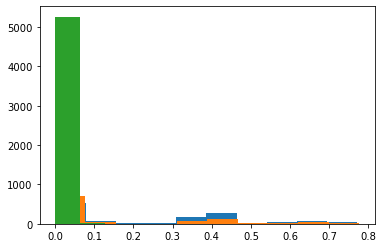

In [79]:
pl.hist(endo19160.obs['dpt_pseudotime'])
pl.hist(endo18511.obs['dpt_pseudotime'])

pl.hist(endo18858.obs['dpt_pseudotime'])

In [27]:
hep18511 = hep[hep.obs['individual'] =='SNG-NA18511']
hep18858 = hep[hep.obs['individual'] == 'SNG-NA18858']
hep19160 = hep[hep.obs['individual'] == 'SNG-NA19160']

(array([5.263e+03, 3.400e+01, 2.000e+00, 2.000e+00, 4.000e+00, 1.020e+02,
        5.900e+01, 4.000e+00, 2.000e+00, 2.000e+00]),
 array([0.        , 0.06350409, 0.12700818, 0.19051228, 0.25401637,
        0.31752047, 0.38102457, 0.44452867, 0.50803274, 0.57153684,
        0.63504094], dtype=float32),
 <a list of 10 Patch objects>)

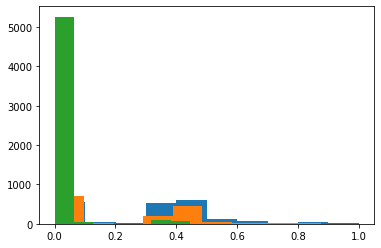

In [28]:
pl.hist(hep19160.obs['dpt_pseudotime'])
pl.hist(hep18511.obs['dpt_pseudotime'])
pl.hist(hep18858.obs['dpt_pseudotime'])

In [29]:
neur18511 = neur[neur.obs['individual'] =='SNG-NA18511']
neur18858 = neur[neur.obs['individual'] == 'SNG-NA18858']
neur19160 = neur[neur.obs['individual'] == 'SNG-NA19160']

(array([5249.,   55.,   20.,   20.,   20.,   61.,  698.,   77.,   13.,
           9.]),
 array([0.        , 0.05844131, 0.11688262, 0.17532393, 0.23376524,
        0.29220656, 0.35064787, 0.40908918, 0.4675305 , 0.5259718 ,
        0.5844131 ], dtype=float32),
 <a list of 10 Patch objects>)

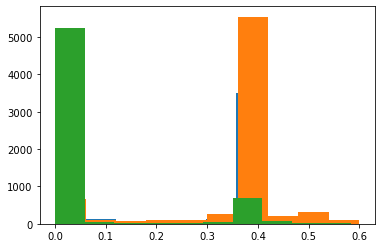

In [80]:
pl.hist(neur19160.obs['dpt_pseudotime'])
pl.hist(neur18511.obs['dpt_pseudotime'])

pl.hist(neur18858.obs['dpt_pseudotime'])

In [60]:
neur

View of AnnData object with n_obs × n_vars = 22688 × 17066 
    obs: 'Batch', 'ClusterID', 'ClusterName', 'EmptyDrops_FDR', 'EmptyDrops_Limited', 'EmptyDrops_LogProb', 'EmptyDrops_Pvalue', 'EmptyDrops_Total', 'EmptyDrops_knee', 'SCT_snn_res_0_8', 'SCT_snn_res_1', 'SampleID', 'chimp_score', 'hg_specificity_score', 'human_score', 'individual', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'percent_mt', 'percent_rp', 'percent_rpl', 'percent_rps', 'seurat_clusters', 'dpt_pseudotime', 'distance'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    uns: 'Batch_colors', 'SampleID_colors', 'draw_graph', 'individual_colors', 'neighbors', 'paga', 'seurat_clusters_colors', 'seurat_clusters_sizes', 'iroot', 'diffmap_evals'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'harmony_cell_embeddings', 'pca_cell_embeddings', 'umap_cell_embeddings', 'X_diffmap'
    varm: 'PCs', 'harmony_feature_loadings_proje

In [61]:
sc.pp.normalize_total(neur, target_sum=1e4)
sc.pp.log1p(neur)
sc.pp.highly_variable_genes(neur)

/home-2/jpopp4@jhu.edu/.local/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:297: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


In [73]:
testin = neur.X.toarray()

In [82]:
np.amax(testin)

1287.7672

In [83]:
np.amin(testin)

0.0

In [84]:
adata.X

<52232x17066 sparse matrix of type '<class 'numpy.float32'>'
	with 200512986 stored elements in Compressed Sparse Row format>

In [86]:
fulltestin = adata.X.toarray()
np.amax(fulltestin)

5426.0

In [87]:
np.amin(fulltestin)

0.0

In [88]:
fulltestin

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 2.527167 , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 3.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 2.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.3740038, 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [25]:
adatarray = adata.X.toarray()
nonints = 0
for cell in adatarray:
    for g in cell:
        if not g.item().is_integer():
            nonints += 1
print(nonints)

0
